# Lab 12 - Regularized Logistic Regression - [25 points]- Solutions

Let's use some of the techniques that we learned from Unit 15 to see if we can improve our fake/real instagram account classifier.

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import t, norm, f, bernoulli

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

### 1. [.5 pt] Read the fake_insta.csv into a dataframe called df.

In [2]:
df=pd.read_csv('fake_insta.csv')
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type
0,yes,1,30,35,488,604,real
1,yes,5,64,3,35,6,real
2,yes,2,82,319,328,668,real
3,yes,1,143,273,14890,7369,real
4,yes,1,76,6,225,356,real


### 2. [0.5 pt] Next, create a new variable in df that is equal to 1 when the account type is fake and is equal to 0 when the account type is real.

In [3]:
df['y']=df['account_type'].map({'fake':1, 'real':0})
df['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

### 3. [1pt] Overwrite the has_a_profile_pic column in this dataframe such that "yes" is represented by a 1 and "no" is represented by a 0.

In [4]:
df['has_a_profile_pic']=df['has_a_profile_pic'].map({'yes':1, 'no':0})
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type,y
0,1,1,30,35,488,604,real,0
1,1,5,64,3,35,6,real,0
2,1,2,82,319,328,668,real,0
3,1,1,143,273,14890,7369,real,0
4,1,1,76,6,225,356,real,0


### 4. [1pt] In this model (as we did in lab 11), we would like to build a full model that predicts account_type using the following explanatory variables:
* has_a_profile_picture
* number_of_words_in_name
* num_characters_in_bio
* number_of_posts
* number_of_followers
* number_of_follows

### Create a features matrix (in the form of a dataframe) and call it X. And create a target array (in the form of a dataframe) and call it y.

In [5]:
X=df.drop(columns=['y','account_type'])
X.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows
0,1,1,30,35,488,604
1,1,5,64,3,35,6
2,1,2,82,319,328,668
3,1,1,143,273,14890,7369
4,1,1,76,6,225,356


In [6]:
y=df['y']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

### 5. [2pt] Create a heatmap that visualizes the the *median* value of each of the six explanatory variables for real vs. fake accounts.

#### Additional Stipulation: Select a color map that is something different from the 'Blues_r' color map that we used in class.
https://matplotlib.org/3.3.3/tutorials/colors/colormaps.html


In [7]:
mean_matrix = np.array((X[y==0].median(), X[y==1].median()))
display(mean_matrix.shape, mean_matrix)

(2, 6)

array([[  1. ,   2. ,  41. ,  48.5, 430.5, 470. ],
       [  1. ,   1. ,   0. ,   1. ,  71.5, 163. ]])

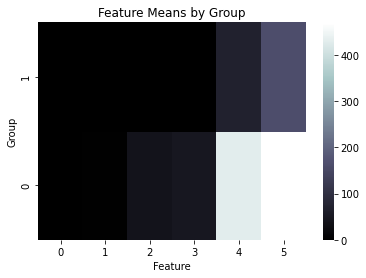

In [8]:
fig = sns.heatmap(mean_matrix, annot=False, linewidths=0, 
            square = False, cmap = 'bone');
fig.set_ylim([0,2]);
plt.ylabel('Group');
plt.xlabel('Feature');
all_sample_title = 'Feature Means by Group'
plt.title(all_sample_title, size = 12);
plt.show(fig)

### 6. [1.5pt] Fit a non-regularized logistic regression model with the following specifications.
* Use the newton-cg solver.
* Using cross-validation with k=6 folds.

#### Print out each of the 6 accuracy scores for each of the 6 folds.

#### Calculate the average of these 6 scores.

#### Finally, create a confidence interval for this average (using a critical value =2). (Remember the formula we use for a confidence interval of an average of a sample of size n=6).

In [9]:
modclass0 = LogisticRegression(penalty='none', solver='newton-cg')
scores0 = cross_val_score(modclass0, X, y, cv=6)
scores0

C:\Tuan\Coding\Python\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Tuan\Coding\Python\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Tuan\Coding\Python\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Tuan\Coding\Python\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Tuan\Coding\Python\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increas

array([1.  , 0.9 , 0.75, 0.85, 0.95, 0.95])

In [10]:
print("Accuracy: %0.2f (+/- %0.2f)" % \
      (scores0.mean(), 2*scores0.std()/np.sqrt(5)))

Accuracy: 0.90 (+/- 0.07)


### 7.  [1.5pt]  Fit a LASSO logistic regression model with the following specifications.
* Use the liblinear solver, which will use a maximum of 2000 iterations. 
* Using cross-validation with k=6 folds.
* Using $\lambda=.2$.


#### Calculate the average of these 6 scores.

#### Finally, create a confidence interval for this average (using a critical value =2). (Remember the formula we use for a confidence interval of an average of a sample of size n=6).

In [11]:
modclass1 = LogisticRegression(penalty='l1', 
                               solver='liblinear', 
                               C=5, 
                               max_iter=2000)
scores1 = cross_val_score(modclass1, X, y, cv=6)
scores1

array([0.9 , 0.95, 0.75, 0.75, 0.9 , 0.85])

In [12]:
print("Accuracy: %0.2f (+/- %0.2f)" % \
      (scores1.mean(), 2*scores1.std()/np.sqrt(5)))

Accuracy: 0.85 (+/- 0.07)


### 8.  [1.5pt]  Fit a ridge regression logistic regression model with the following specifications.
* Use the newton-cg solver, which will use a maximum of 2000 iterations. 
* Using cross-validation with k=6 folds.
* Using $\lambda=.2$.


#### Calculate the average of these 6 scores.

#### Finally, create a confidence interval for this average (using a critical value =2). (Remember the formula we use for a confidence interval of an average of a sample of size n=6).

In [13]:
modclass2 = LogisticRegression(penalty='l2', 
                               solver='newton-cg', 
                               C=5, 
                               max_iter=2000)
scores2 = cross_val_score(modclass2, X, y, cv=6)
scores2

array([0.95, 0.95, 0.7 , 0.75, 0.9 , 0.9 ])

In [14]:
print("Accuracy: %0.2f (+/- %0.2f)" % \
      (scores2.mean(), 2*scores2.std()/np.sqrt(5)))

Accuracy: 0.86 (+/- 0.09)


### 9.  [1.5pt] Fit an elastic net logistic regression model with the following specifications.
* Use the saga solver, which will use a maximum of 2000 iterations. 
* Using cross-validation with k=6 folds.
* Using $\lambda=.2$.
* Using $\alpha=.3$


#### Calculate the average of these 6 scores.

#### Finally, create a confidence interval for this average (using a critical value =2). (Remember the formula we use for a confidence interval of an average of a sample of size n=6).

In [15]:
modclass3 = LogisticRegression(penalty='elasticnet', 
                               solver='saga', 
                               l1_ratio=0.3, 
                               C=5, 
                               max_iter=2000)
scores3 = cross_val_score(modclass3, X, y, cv=6)
scores3

C:\Tuan\Coding\Python\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Tuan\Coding\Python\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Tuan\Coding\Python\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Tuan\Coding\Python\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Tuan\Coding\Python\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did

array([0.65, 0.55, 0.6 , 0.55, 0.5 , 0.5 ])

In [16]:
print("Accuracy: %0.2f (+/- %0.2f)" % \
      (scores3.mean(), 2*scores3.std()/np.sqrt(5)))

Accuracy: 0.56 (+/- 0.05)


### 10. [1pt] Which of these four models would you *least* want to build a classifier with the given feature matrix and target array? Explain why.

Since the elastic logistic regression model has the lowest accuracy with mean score = 0.56, It is less efficient to bui a classifier with the given feature matrix and target array.  

## 11.  [1pt]  Next, create a *single training dataset* and a *single test dataset* with the following specifications.
* The training dataset that is 85% of the rows.
* Use a random state of 1000 to randomly select the training dataset and test dataset.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=1000)

## 12  [1pt] Then train a LASSO logistic regression model with your training dataset using the following specifications.
* Use the liblinear solver, which will use a maximum of 2000 iterations. 
* Using $\lambda=.2$.

In [18]:
logitReg = LogisticRegression(penalty='l1', 
                              solver='liblinear', 
                              C=5, 
                              max_iter=2000)

In [19]:
logitReg.fit(X_train, y_train)

LogisticRegression(C=5, max_iter=2000, penalty='l1', solver='liblinear')

### 13 [1pt]  Next, find the predictive probabilities of the test dataset. Make sure to create a vector that is *just* comprised of the probabilities that each observation in the test dataset has a response variable value *equal to 1*.

In [20]:
phat01 = logitReg.predict_proba(X_test)
phat01

array([[1.67639462e-01, 8.32360538e-01],
       [1.45095725e-01, 8.54904275e-01],
       [9.98769841e-01, 1.23015936e-03],
       [1.43412893e-02, 9.85658711e-01],
       [2.70107142e-02, 9.72989286e-01],
       [3.58182548e-01, 6.41817452e-01],
       [9.99105082e-01, 8.94917672e-04],
       [1.80943014e-02, 9.81905699e-01],
       [2.55545077e-02, 9.74445492e-01],
       [3.44609379e-01, 6.55390621e-01],
       [4.57614485e-03, 9.95423855e-01],
       [9.99767090e-01, 2.32910015e-04],
       [1.44958757e-02, 9.85504124e-01],
       [8.27068554e-01, 1.72931446e-01],
       [2.75496243e-01, 7.24503757e-01],
       [1.00000000e+00, 3.72108328e-13],
       [9.00055890e-02, 9.09994411e-01],
       [4.12759433e-01, 5.87240567e-01]])

In [21]:
phat1=phat01[:,1]
phat1

array([8.32360538e-01, 8.54904275e-01, 1.23015936e-03, 9.85658711e-01,
       9.72989286e-01, 6.41817452e-01, 8.94917672e-04, 9.81905699e-01,
       9.74445492e-01, 6.55390621e-01, 9.95423855e-01, 2.32910015e-04,
       9.85504124e-01, 1.72931446e-01, 7.24503757e-01, 3.72108328e-13,
       9.09994411e-01, 5.87240567e-01])

### 14.  [2pt]  Next, plot the ROC curve and display the the AUC for this LASSO model using the test data.

In [22]:
fpr, tpr, score = metrics.roc_curve(y_true=y_test, y_score=phat1)
auc = metrics.roc_auc_score(y_true=y_test, y_score=phat1)


In [23]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

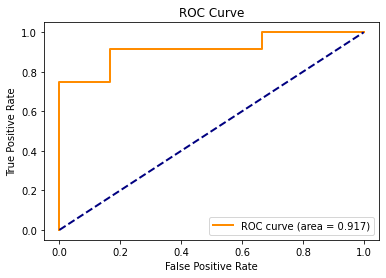

In [24]:
plot_roc(fpr, tpr, auc)

## 15.  [1pt]  Then train a non-regularized logistic regression model with your training dataset using the following specifications.
* Use the newton-cg solver.

#### (Make sure you call your model class something different than what you called your LASSO model).

In [25]:
logitReg1 = LogisticRegression(penalty='none', solver='newton-cg')

In [26]:
logitReg1.fit(X_train,y_train)

C:\Tuan\Coding\Python\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


LogisticRegression(penalty='none', solver='newton-cg')

### 16.  [1pt]  Next, find the predictive probabilities of the test dataset. Make sure to create a vector that is *just* comprised of the probabilities that each observation in the test dataset has a response variable value *equal to 1*.

In [27]:
phat01b=logitReg1.predict_proba(X_test)

In [28]:
phat1b=phat01b[:,1]
phat1b

array([1.00000000e+00, 9.69031372e-01, 8.50013397e-06, 1.00000000e+00,
       1.00000000e+00, 7.42123879e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 6.32562049e-01, 9.99793151e-01, 1.72355544e-08,
       9.99955785e-01, 1.17650984e-01, 3.32369914e-01, 1.10365715e-97,
       9.98195744e-01, 1.82060809e-01])

### 17. [1pt]  Next, plot the ROC curve and display the the AUC for this non-regularized logistic regression model using the test data.

In [29]:
fpr, tpr, score = metrics.roc_curve(y_true=y_test, y_score=phat1b)
auc = metrics.roc_auc_score(y_true=y_test, y_score=phat1b)

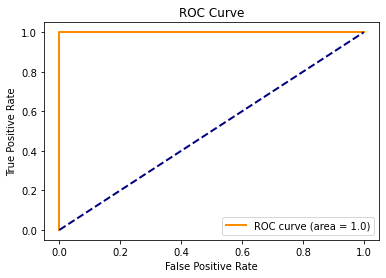

In [30]:
plot_roc(fpr, tpr, auc)

## 18. [1pt]  Did the LASSO or the non-regularized logistic regression model perform better on the test data set? Explain why.

The non-regularized logistic regression model perform better on the test data set because its AUC is 1, which is perfect.

## 19.  [1pt]  Create a dataframe that is comprised of the coefficients returned by the LASSO model and the coefficients returned by the non-regularized regression model.

In [31]:
dfcoef = pd.DataFrame(
    np.concatenate((logitReg.coef_.T, 
                    logitReg1.coef_.T,), 
                   axis=1))
dfcoef

,0,1
0,-2.997879,-47.651726
1,-0.435261,-0.812171
2,-0.112384,-0.093602
3,-0.007728,-0.000621
4,-0.001657,-0.017204
5,0.001848,0.006016


### 20.  [2pt]  Plot the coefficients for the LASSO and the non-regularized logistic regression model in a line plot (one line for each model).

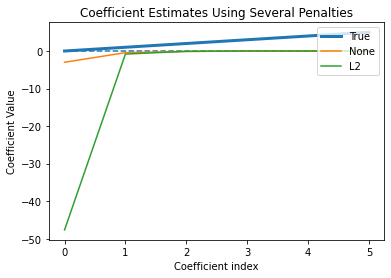

In [32]:
plt.plot(dfcoef.index, lw=3)
for i in range(2):
    plt.plot(dfcoef.index, dfcoef[i])
plt.xticks(np.arange(0,6,1))
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Estimates Using Several Penalties')
plt.legend(['True','None','L2'], loc='upper right')
plt.hlines(y=0, xmin=0, xmax=5, linestyles='--')
plt.show()

### 21.  [1pt]  Which slope showed the largest reduction in magnitude in switching from the non-regularized logistic regression to the LASSO logistic regression?

(Looking for the actual *name* of the explanatory variable that this slope corresponds to).

The slope 'has_a_profile_pic' (slope 0) showed the largest reduction in magnitude in switching from the non-regularized logistic regression to the LASSO logistic regression.